# GOOGLE PLAY STORE ANALYSIS

## Web scraped data of 10k Play Store apps for analysing the Android market
## -----------------------------------------------------------------------------------------------------------

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

### IMPORTING DATASET

In [2]:
df=pd.read_csv('googleplaystore.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.shape

(10841, 13)

### HANDLING NULL VALUES

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Using average method to fill in the null values of Rating column
df.Rating.fillna(df.Rating.mean(),inplace=True)
df.Rating=df.Rating.apply(lambda x:round(x,2))

In [9]:
# Drop rest of the Null values
df.dropna(inplace=True,axis=0)

In [10]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### DATA CLEANING

In [12]:
# Reviews Column
df.Reviews.dtype

dtype('O')

In [13]:
df.Reviews=df.Reviews.astype('int')

In [14]:
# Size Column
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
# Installs Column
df['Installs']=df['Installs'].str.replace('[,+]','').astype('float')

In [16]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100.0,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,1000.0,Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
# Price Column
df.Price.unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [18]:
df['Price']=df['Price'].str.replace('$','').str.replace(' ','').astype('float')

In [19]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [20]:
# Last Updated Column
df['Month']=df['Last Updated'].apply(lambda x: x.split(' ')[0])

In [21]:
df['Day']=df['Last Updated'].apply(lambda x: x.split(' ')[1].split(',')[0])

In [22]:
df['Year']=df['Last Updated'].apply(lambda x: x.split(',')[1])

In [23]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,Day,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June,20,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,July,25,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up,July,6,2018
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up,January,20,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,January,19,2015


In [24]:
df.drop('Last Updated',axis=1,inplace=True)

In [25]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Day,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June,20,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,5000.0,Free,0.0,Everyone,Education,1.48,4.1 and up,July,25,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100.0,Free,0.0,Everyone,Education,1,4.1 and up,July,6,2018
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,1000.0,Free,0.0,Everyone,Medical,1,2.2 and up,January,20,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,January,19,2015


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  float64
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Current Ver     10829 non-null  object 
 11  Android Ver     10829 non-null  object 
 12  Month           10829 non-null  object 
 13  Day             10829 non-null  object 
 14  Year            10829 non-null  object 
dtypes: float64(3), int32(1), object(11)
memory usage: 1.3+ MB


### DATA VISUALIZATION

Text(0.5, 1.0, 'Frequency of App categories')

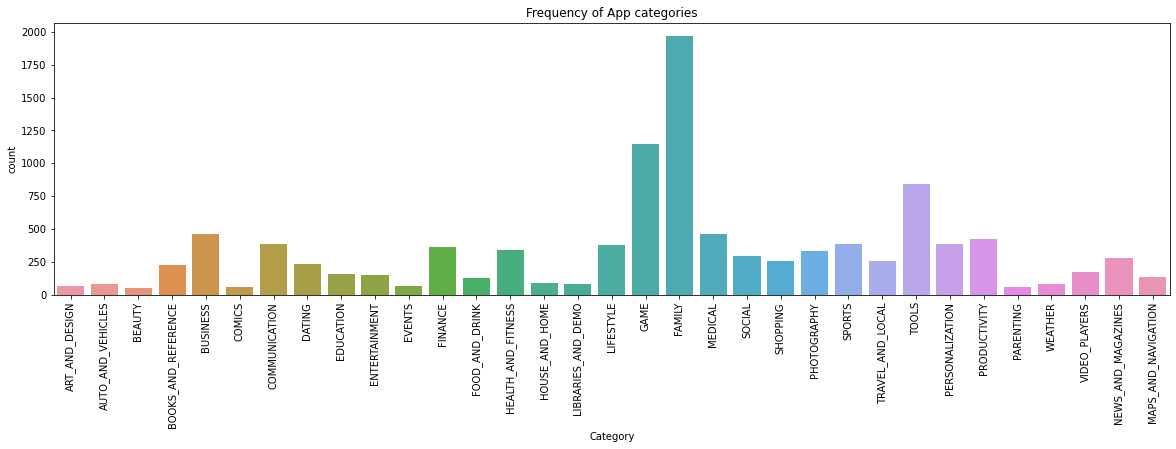

In [27]:
# Frequency Plot of Category
plt.figure(figsize=(20,5))
sns.countplot(df.Category)
plt.xticks(rotation=90)
plt.title('Frequency of App categories')

In [28]:
# Family apps are the most in number

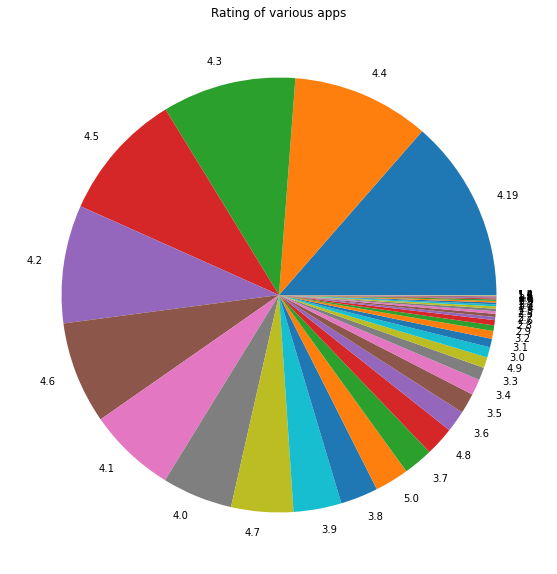

In [29]:
# Pie Chart of Rating
plt.figure(figsize=(10,10))
plt.pie(df.Rating.value_counts(),labels=df.Rating.value_counts().index)
plt.title('Rating of various apps')
plt.show()

Text(0.5, 1.0, 'App Sizes')

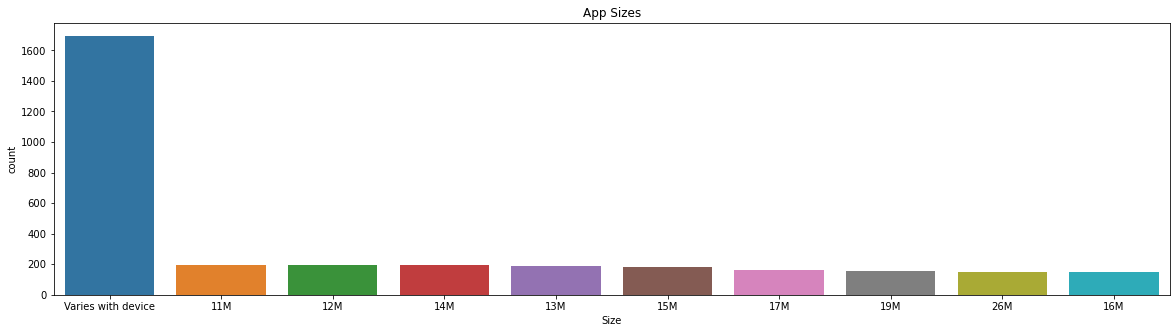

In [30]:
# App Size
plt.figure(figsize=(20,5))
sns.countplot(df.Size,order=df.Size.value_counts().index[:10])
plt.title('App Sizes')

In [31]:
# Most apps have size=0 i.e. its size depends on the system in which the app is being used
# Of the rest apps, most apps have similar size with most frequent size=11M

Text(0.5, 1.0, 'Free and Paid Apps per Content Rating')

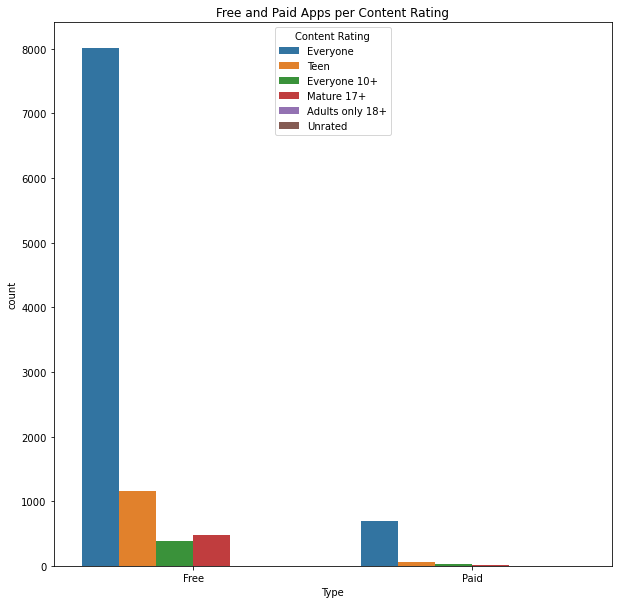

In [32]:
# Free v/s Paid apps per Content Rating
plt.figure(figsize=(10,10))
sns.countplot(df['Type'],hue=df['Content Rating'])
plt.title('Free and Paid Apps per Content Rating')

In [33]:
# Mostly apps for Everyone are available in both the categories

<AxesSubplot:xlabel='Rating', ylabel='Installs'>

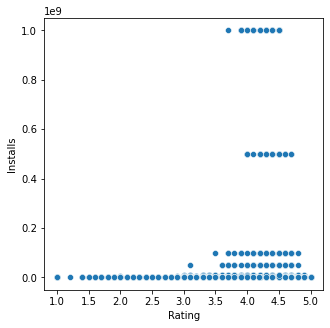

In [34]:
# Rating v/s Installs
plt.figure(figsize=(5,5))
sns.scatterplot(x=df.Rating,y=df.Installs)

Text(0.5, 1.0, 'Frequency of App genres')

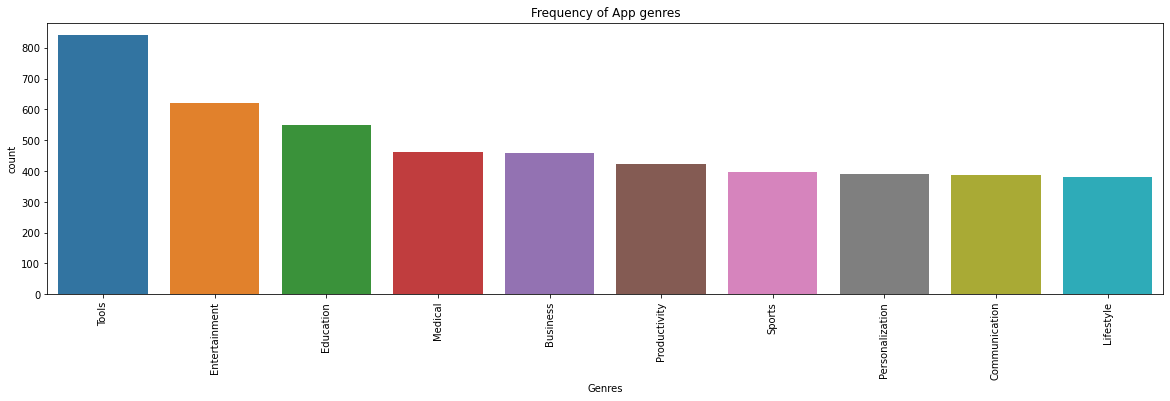

In [35]:
# Frequency Plot of Genres
plt.figure(figsize=(20,5))
order=df['Genres'].value_counts().index[:10]
sns.countplot(x = 'Genres',data = df,order = order)
plt.xticks(rotation=90)
plt.title('Frequency of App genres')

In [36]:
# Most apps belong to Tools and Entertainment Genre

<AxesSubplot:ylabel='Price'>

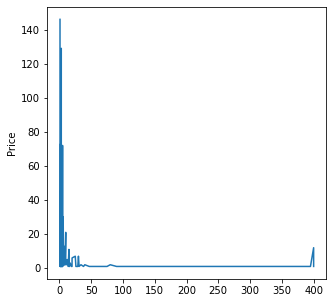

In [37]:
# App Prices for Paid apps
plt.figure(figsize=(5,5))
sns.lineplot(x=df[df.Type=='Paid'].Price.value_counts().index,y=df[df.Type=='Paid'].Price.value_counts())

Text(0.5, 1.0, 'Monthly app updates')

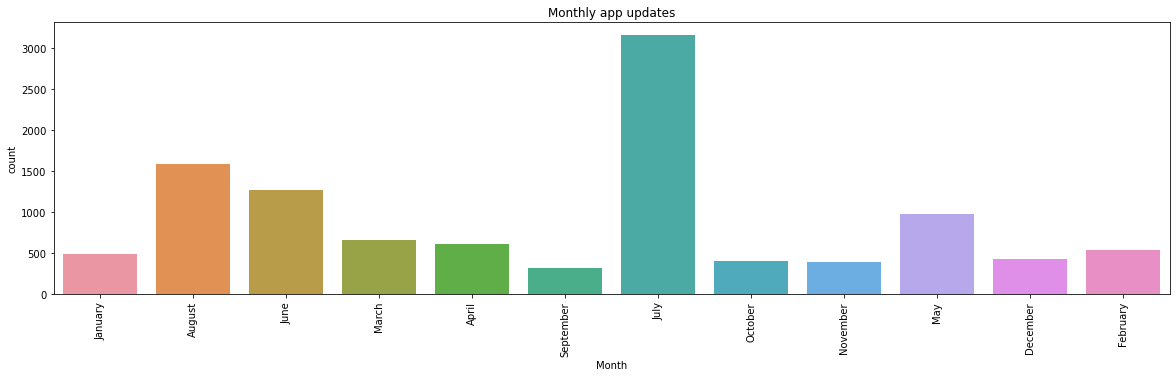

In [38]:
# Monthly app updates
plt.figure(figsize=(20,5))
sns.countplot(x = 'Month',data = df)
plt.xticks(rotation=90)
plt.title('Monthly app updates')

In [39]:
# Mostly apps were updated in the month of July

Text(0.5, 1.0, 'Yearly app updates')

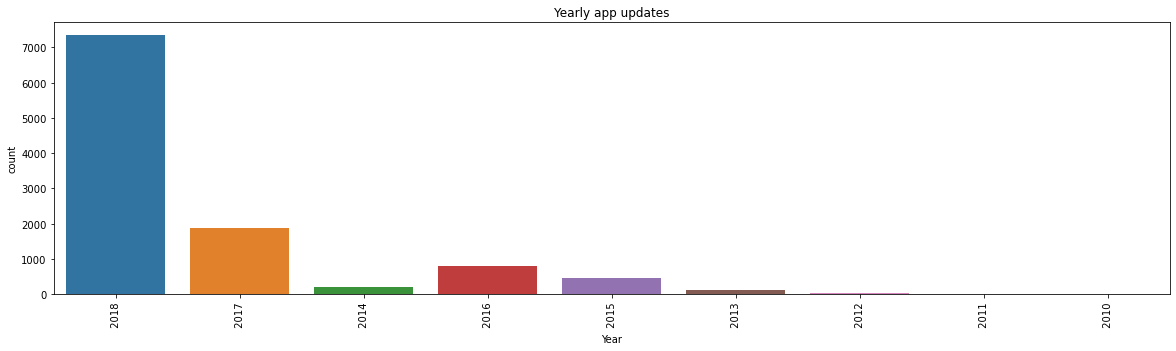

In [40]:
# Monthly app updates
plt.figure(figsize=(20,5))
sns.countplot(x = 'Year',data = df)
plt.xticks(rotation=90)
plt.title('Yearly app updates')

In [41]:
# Most apps were updated in the year 2018

### CATEGORICAL ENCODING

In [42]:
# Drop unwanted columns
df.drop(['App','Current Ver','Android Ver','Day','Size'],inplace=True,axis=1)

In [43]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [44]:
# Type
df.Type=label.fit_transform(df.Type)

In [45]:
# Category
df.Category=label.fit_transform(df.Category)

In [46]:
# Content Rating
df['Content Rating']=label.fit_transform(df['Content Rating'])

In [47]:
# Genre
df.Genres=label.fit_transform(df.Genres)

In [48]:
# Month
df.Month=label.fit_transform(df.Month)

In [49]:
df

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Month,Year
0,0,4.10,159,10000.0,0,0.0,1,9,4,2018
1,0,3.90,967,500000.0,0,0.0,1,12,4,2018
2,0,4.70,87510,5000000.0,0,0.0,1,9,1,2018
3,0,4.50,215644,50000000.0,0,0.0,4,9,6,2018
4,0,4.30,967,100000.0,0,0.0,1,11,6,2018
...,...,...,...,...,...,...,...,...,...,...
10836,11,4.50,38,5000.0,0,0.0,1,39,5,2017
10837,11,5.00,4,100.0,0,0.0,1,39,5,2018
10838,20,4.19,3,1000.0,0,0.0,1,71,4,2017
10839,3,4.50,114,1000.0,0,0.0,3,19,4,2015


### APPROPRIATE VALUE OF K FOR K MEAN CLUSTERING

In [50]:
from sklearn.cluster import KMeans

# Using elbow method

lst=[]
for i in range(1,11):
    kmodel=KMeans(n_clusters=i,n_init=15,max_iter=500)
    kmodel.fit(df)
    lst.append(kmodel.inertia_)

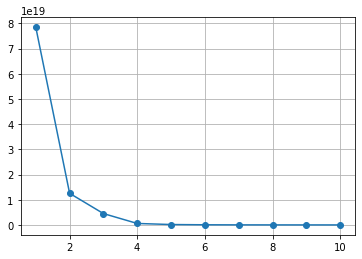

In [51]:
# Plot WCSS values
plt.plot(range(1,11),lst,marker='o')
plt.grid()

In [52]:
# Appropriate value of k=4

### K MEAN CLUSTERING

In [53]:
kmodel=KMeans(n_clusters=4)
kmodel.fit(df)

KMeans(n_clusters=4)

In [54]:
prediction=kmodel.predict(df)

In [55]:
kmodel.cluster_centers_

array([[ 1.66110389e+01,  4.17645335e+00,  5.93444068e+04,
         1.82800284e+06,  7.96920308e-02,  1.11320868e+00,
         1.44325567e+00,  6.43042696e+01,  4.96330367e+00,
         2.01735836e+03],
       [ 1.75517241e+01,  4.25862069e+00,  2.13361817e+07,
         1.00000000e+09,  0.00000000e+00,  2.22044605e-16,
         2.03448276e+00,  6.39827586e+01,  2.51724138e+00,
         2.01800000e+03],
       [ 1.77777778e+01,  4.35000000e+00,  9.95738378e+06,
         5.00000000e+08,  0.00000000e+00,  2.22044605e-16,
         1.50000000e+00,  5.89166667e+01,  3.98611111e+00,
         2.01800000e+03],
       [ 1.82091691e+01,  4.38653295e+00,  3.24736239e+06,
         7.92979943e+07, -1.38777878e-16, -4.44089210e-16,
         1.73209169e+00,  6.42048711e+01,  3.93696275e+00,
         2.01788825e+03]])

In [56]:
# New column denoting each data falls in which cluster
df['Cluster']=prediction

In [57]:
df

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Month,Year,Cluster
0,0,4.10,159,10000.0,0,0.0,1,9,4,2018,0
1,0,3.90,967,500000.0,0,0.0,1,12,4,2018,0
2,0,4.70,87510,5000000.0,0,0.0,1,9,1,2018,0
3,0,4.50,215644,50000000.0,0,0.0,4,9,6,2018,3
4,0,4.30,967,100000.0,0,0.0,1,11,6,2018,0
...,...,...,...,...,...,...,...,...,...,...,...
10836,11,4.50,38,5000.0,0,0.0,1,39,5,2017,0
10837,11,5.00,4,100.0,0,0.0,1,39,5,2018,0
10838,20,4.19,3,1000.0,0,0.0,1,71,4,2017,0
10839,3,4.50,114,1000.0,0,0.0,3,19,4,2015,0


<AxesSubplot:xlabel='Category', ylabel='Installs'>

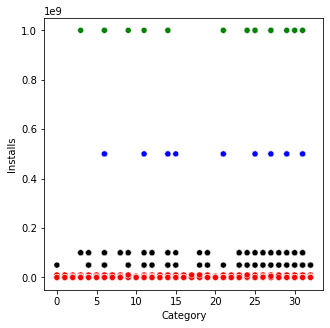

In [58]:
# Scatter Plot to visualize the clusters

plt.figure(figsize=(5,5))
colour=np.array(['red','green','blue','black'])
sns.scatterplot(x=df['Category'],y=df['Installs'],c=colour[kmodel.labels_])

<AxesSubplot:xlabel='Genres', ylabel='Installs'>

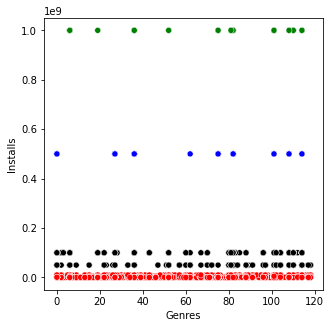

In [59]:
plt.figure(figsize=(5,5))
colour=np.array(['red','green','blue','black'])
sns.scatterplot(x=df['Genres'],y=df['Installs'],c=colour[kmodel.labels_])

<AxesSubplot:xlabel='Year', ylabel='Installs'>

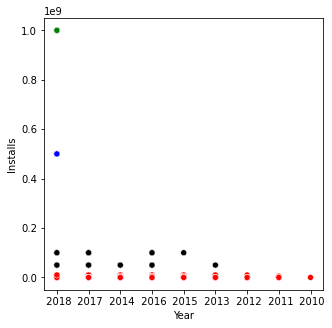

In [60]:
plt.figure(figsize=(5,5))
colour=np.array(['red','green','blue','black'])
sns.scatterplot(x=df['Year'],y=df['Installs'],c=colour[kmodel.labels_])

<AxesSubplot:xlabel='Rating', ylabel='Installs'>

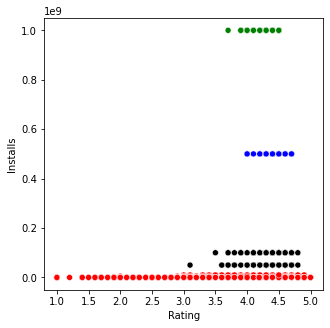

In [61]:
plt.figure(figsize=(5,5))
colour=np.array(['red','green','blue','black'])
sns.scatterplot(x=df['Rating'],y=df['Installs'],c=colour[kmodel.labels_])

<AxesSubplot:xlabel='Content Rating', ylabel='Installs'>

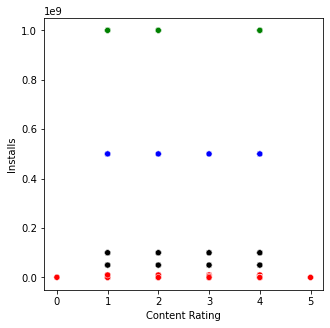

In [62]:
plt.figure(figsize=(5,5))
colour=np.array(['red','green','blue','black'])
sns.scatterplot(x=df['Content Rating'],y=df['Installs'],c=colour[kmodel.labels_])